# Instructions

For the most part, everything in this notebook *should* run "as is".  You might want to change the `output_dir` which is where various visualizations are put.  

Also, there are a number of packages you'll need to install, these include:
1.  Scikit-Learn - `pip install -U scikit-learn `
2.  Pything Image Library - `pip install PIL`

For the most part, everything is written with generic python although the datasets are drawn from these auxiliary libraries.  I do use Numpy a bit for a few functions too, but almost everything is "from scratch".

# Output Directory

In [1]:
import os
output_dir = '/tmp/'

# Matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset from Scikit-Learn

In [3]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from collections import defaultdict

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

## Visualize Data

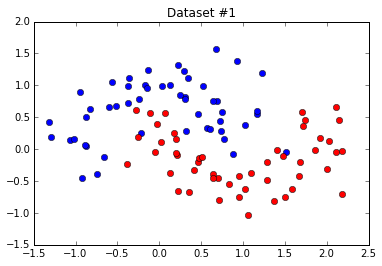

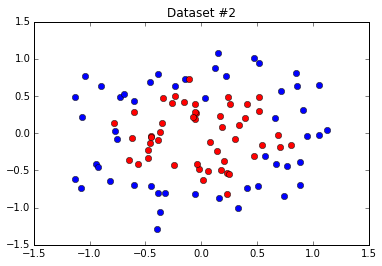

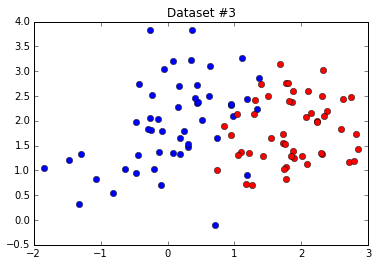

In [4]:
for dataset_index, dataset in enumerate(datasets):
    xes = defaultdict(list)
    Xes, labels = dataset
    
    for X, label in zip(Xes, labels):
        xes[label].append(X)
        
    
    plt.plot(zip(*xes[0])[0], zip(*xes[0])[1], c='b', linestyle='None', marker='o')
    plt.plot(zip(*xes[1])[0], zip(*xes[1])[1], c='r', linestyle='None', marker='o')
    plt.title('Dataset #%i' % (dataset_index+1))
    plt.show()

# Single Neuron

In [5]:
import random
import numpy as np

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def sigmoid_derivative(x):
    exp = np.exp(-x)
    return exp/(1+exp)**2.
    
class Neuron:    
    def __init__(self, num_inputs, activation, activation_derivative, weights=None):
        self.num_inputs = num_inputs
        self.activation = activation
        self.activation_derivative = activation_derivative
        if weights is None:
            self.weights = [np.random.uniform(-1.,1.) for _ in range(num_inputs+1)]
        else:
            self.weights = weights
    
    def neuron_output(self, inputs):
        self.inputs = inputs+[1]
        self.raw_output = sum([weight*input for weight, input in zip(self.weights, self.inputs)])
        self.output = self.activation(self.raw_output)
        return self.output
    
    def backpropagate(self, truth, learning_rate):
        delta = (self.output-truth)*self.activation_derivative(self.raw_output)
        for i, (weight, input) in enumerate(zip(self.weights, self.inputs)):
            self.weights[i] = weight - learning_rate*delta*input

## Train the Network

Dataset #1
MSE: 0.19593
MSE: 0.10813
MSE: 0.10804
MSE: 0.10804
MSE: 0.10804
MSE: 0.10804
MSE: 0.10804
MSE: 0.10804
MSE: 0.10804
MSE: 0.10804

Dataset #2
MSE: 0.28598
MSE: 0.25249
MSE: 0.25249
MSE: 0.25249
MSE: 0.25249
MSE: 0.25249
MSE: 0.25249
MSE: 0.25249
MSE: 0.25249
MSE: 0.25249

Dataset #3
MSE: 0.13551
MSE: 0.05159
MSE: 0.05076
MSE: 0.05055
MSE: 0.05048
MSE: 0.05046
MSE: 0.05045
MSE: 0.05046
MSE: 0.05046
MSE: 0.05047



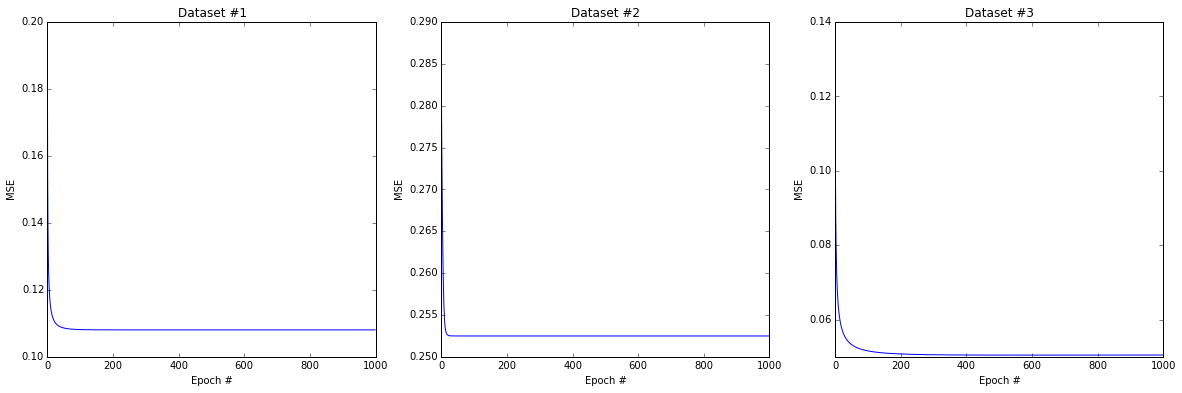

In [6]:
dataset_model_list = []
f, axarr = plt.subplots(1, len(datasets), figsize=(20.,6.))
for dataset_i, dataset in enumerate(datasets):
    print "Dataset #%i" % (dataset_i+1)
    my_neuron = Neuron(num_inputs=2, 
                       activation=sigmoid,
                       activation_derivative=sigmoid_derivative)

    # number of training epochs
    num_epochs = 1000
    # learning rate
    lr = 0.1
    
    # How often we show the MSE while training
    mod_amount = int(num_epochs/10)
    mses = []
    
    # get number of training elements
    num_train_elements = len(dataset[0])
    for i in range(num_epochs):
        mse = 0.
        Xes, labels = dataset
        for X, label in zip(Xes, labels):
            # feed forward
            output = my_neuron.neuron_output(list(X))
            delta = output-label
            # back propagate with truth value
            my_neuron.backpropagate(label, lr)
            # add squared error
            mse += delta**2.
        # calculate MSE
        mse = mse/num_train_elements
        mses.append(mse)
        if i % mod_amount == 0:
            print "MSE: %0.5f" % mse        
    print ""
    # display it all
    axarr[dataset_i].plot(mses)
    axarr[dataset_i].set_title('Dataset #%i' % (dataset_i+1))
    axarr[dataset_i].set_ylabel('MSE')
    axarr[dataset_i].set_xlabel('Epoch #')
    dataset_model_list.append((dataset, my_neuron))
    
plt.savefig(os.path.join(output_dir,'training_mse.png'), dpi=200)

## Display the Trained Models

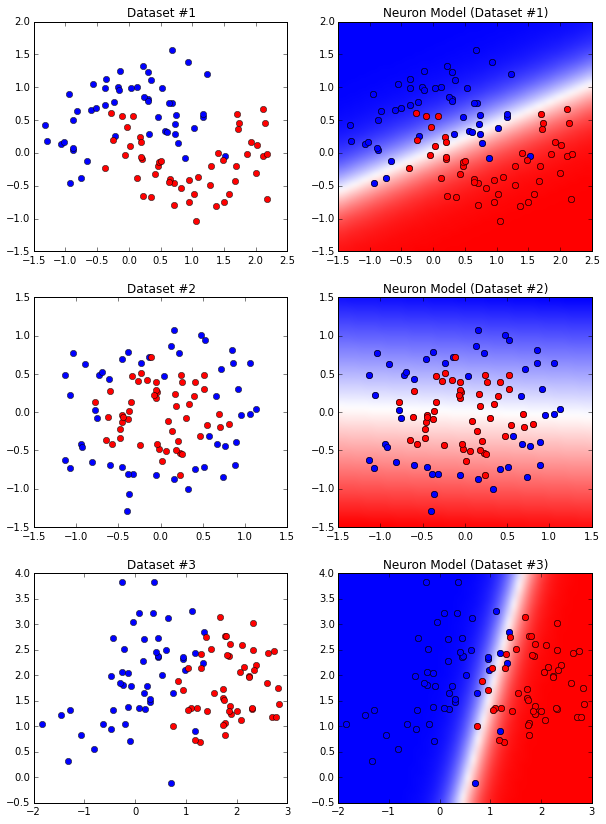

In [7]:
interpolation='Bicubic'
f, axarr = plt.subplots(len(dataset_model_list), 2, figsize=(10.,14.))

for dataset_index, (dataset, model) in enumerate(dataset_model_list):
    xes = defaultdict(list)
    Xes, labels = dataset
    
    for X, label in zip(Xes, labels):
        xes[label].append(X)
        
    
    axarr[dataset_index, 0].plot(zip(*xes[0])[0], zip(*xes[0])[1], c='b', linestyle='None', marker='o')
    axarr[dataset_index, 0].plot(zip(*xes[1])[0], zip(*xes[1])[1], c='r', linestyle='None', marker='o')
    axarr[dataset_index, 0].set_title('Dataset #%i' % (dataset_index+1))
    
    xmin, xmax = axarr[dataset_index, 0].get_xlim()
    ymin, ymax = axarr[dataset_index, 0].get_ylim()
    the_extent = (xmin, xmax, ymin, ymax)
    
    numx = 50
    numy = 50
    dx = (xmax-xmin)/numx
    dy = (ymax-ymin)/numy
    values = np.zeros((numy,numx))
    for i, x in enumerate(np.arange(xmin, xmax, dx)):
        for j, y in enumerate(np.arange(ymin, ymax, dy)):
            output = model.neuron_output([x,y])
            if j<values.shape[0] and i<values.shape[1]:
                values[j,i] = output

    axarr[dataset_index, 1].plot(zip(*xes[0])[0], zip(*xes[0])[1], c='b', linestyle='None', marker='o')
    axarr[dataset_index, 1].plot(zip(*xes[1])[0], zip(*xes[1])[1], c='r', linestyle='None', marker='o')
    axarr[dataset_index, 1].imshow(values, cmap='bwr', interpolation=interpolation, 
                                   extent=the_extent, origin='lowerleft', aspect='auto')
    axarr[dataset_index, 1].plot(zip(*xes[0])[0], zip(*xes[0])[1], c='b', linestyle='None', marker='o')
    axarr[dataset_index, 1].plot(zip(*xes[1])[0], zip(*xes[1])[1], c='r', linestyle='None', marker='o')
    axarr[dataset_index, 1].set_title('Neuron Model (Dataset #%i)' % (dataset_index+1))
plt.savefig(os.path.join(output_dir,'multi_plot.png'), dpi=200)

# Neural Network

In [8]:
import random
import numpy as np

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def sigmoid_derivative(x):
    exp = np.exp(-x)
    return exp/(1+exp)**2.
   
class Neuron:    
    def __init__(self, num_inputs, activation, activation_derivative, weights=None):
        self.num_inputs = num_inputs
        self.activation = activation
        self.activation_derivative = activation_derivative
        if weights is None:
            self.weights = [np.random.uniform(-1.,1.) for _ in range(num_inputs+1)]
        else:
            self.weights = weights
    
    def neuron_output(self, inputs):
        self.inputs = inputs+[1]
        self.raw_output = sum([weight*input for weight, input in zip(self.weights, self.inputs)])
        self.output = self.activation(self.raw_output)
        return self.output
    
    def backpropagate(self, delta, learning_rate, max_norm=-1):
        self.delta = delta        
        for i, (weight, input) in enumerate(zip(self.weights, self.inputs)):
            self.weights[i] = weight - learning_rate*delta*input
        
        if max_norm > 0.:
            weight_norm = np.sqrt(sum([weight**2. for weight in self.weights]))
            max_norm = 5.
            if weight_norm > max_norm:
                scale = max_norm/weight_norm
                for i, weight in enumerate(self.weights):
                    self.weights[i] = weight*scale

class Layer:
    def __init__(self, num_inputs, num_neurons, activation, 
                 activation_derivative):
        self.neurons = [Neuron(num_inputs, activation, activation_derivative) for _ in range(num_neurons)]
    
    def feed_forward(self, inputs):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.neuron_output(inputs))
        return outputs
    
    def backpropagate(self, deltas, learning_rate, max_norm=-1.):
        for neuron, delta in zip(self.neurons, deltas):
            neuron.backpropagate(delta, learning_rate, max_norm)
    
    def sum_delta_weights(self, index):
        the_sum = 0.
        for neuron in self.neurons:
            the_sum += neuron.weights[index]*neuron.delta
        return the_sum
            
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        
    def feed_forward(self, inputs):
        new_inputs = inputs
        for layer in self.layers:
            outputs = layer.feed_forward(new_inputs)
            new_inputs = outputs
        return new_inputs
        
    def backpropagate(self, truth_list, learning_rate, max_norm=-1.):
        deltas = []
        last_layer = self.layers[-1]
        for neuron, truth in zip(last_layer.neurons, truth_list):
            deltas.append((neuron.output-truth)*neuron.activation_derivative(neuron.raw_output))
        
        previous_layer = None
        for layer in reversed(self.layers):
            if previous_layer is not None:
                deltas = []
                for i, neuron in enumerate(layer.neurons):
                    deltas.append(previous_layer.sum_delta_weights(i)*neuron.activation_derivative(neuron.raw_output))
            layer.backpropagate(deltas, learning_rate)
            previous_layer = layer

## Train the NNs

Dataset #1
MSE: 0.23833 (lr=0.100)
MSE: 0.10847 (lr=0.100)
MSE: 0.10764 (lr=0.100)
MSE: 0.10668 (lr=0.100)
MSE: 0.10247 (lr=0.100)
MSE: 0.08157 (lr=0.100)
MSE: 0.05557 (lr=0.100)
MSE: 0.04269 (lr=0.100)
MSE: 0.03652 (lr=0.100)
MSE: 0.03325 (lr=0.100)

Dataset #2
MSE: 0.27672 (lr=0.100)
MSE: 0.24970 (lr=0.100)
MSE: 0.22414 (lr=0.100)
MSE: 0.17690 (lr=0.100)
MSE: 0.15602 (lr=0.100)
MSE: 0.09909 (lr=0.100)
MSE: 0.08458 (lr=0.100)
MSE: 0.07908 (lr=0.100)
MSE: 0.07615 (lr=0.100)
MSE: 0.07417 (lr=0.100)

Dataset #3
MSE: 0.21193 (lr=0.100)
MSE: 0.05055 (lr=0.100)
MSE: 0.04935 (lr=0.100)
MSE: 0.04832 (lr=0.100)
MSE: 0.04658 (lr=0.100)
MSE: 0.04397 (lr=0.100)
MSE: 0.04177 (lr=0.100)
MSE: 0.04036 (lr=0.100)
MSE: 0.03945 (lr=0.100)
MSE: 0.03881 (lr=0.100)



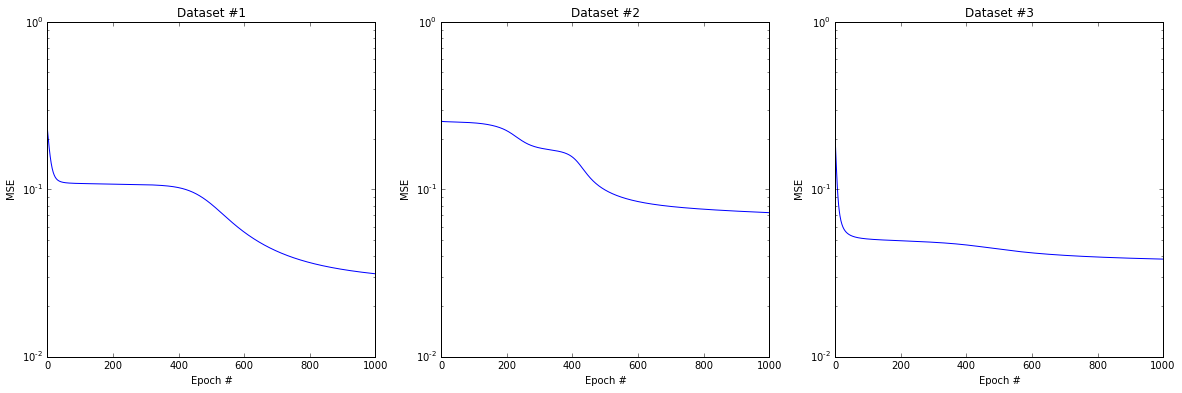

In [9]:
data_model_list = []
f, axarr = plt.subplots(1, len(datasets), figsize=(20.,6.))
for dataset_i, dataset in enumerate(datasets):
    print "Dataset #%i" % (dataset_i+1)
    
    # Build the Neural Network
    layer1 = Layer(2, 5, activation=sigmoid, activation_derivative=sigmoid_derivative)
    layer2 = Layer(5, 1, activation=sigmoid, activation_derivative=sigmoid_derivative)
    nn = NeuralNetwork([layer1, layer2])
    
    training_epochs = 1000
    
    # how often we display the MSE
    mod_amount = int(training_epochs/10)
    mses = []
    
    num_train_elements = len(dataset[0])
    for i in range(training_epochs):
        # learning rate
        lr = 0.1
        # reset mean squared error
        mse = 0.
        Xes, labels = dataset
        for X, label in zip(Xes, labels):
            # feed forward
            output = nn.feed_forward(list(X))
            truths = [label]
            # back propagate
            nn.backpropagate(truths, lr)
            # calculate SE
            mse += (output[0]-label)**2.
        mse = mse/num_train_elements
        mses.append(mse)
        if i % mod_amount == 0:
            print "MSE: %0.5f (lr=%0.3f)" % (mse, lr)
    print ""
    axarr[dataset_i].plot(mses)
    axarr[dataset_i].set_yscale('log')
    axarr[dataset_i].set_title('Dataset #%i' % (dataset_i+1))
    axarr[dataset_i].set_ylabel('MSE')
    axarr[dataset_i].set_xlabel('Epoch #')
    data_model_list.append((dataset, nn))
    
plt.savefig(os.path.join(output_dir,'training_mse.png'), dpi=200)

## Display the NN-Models

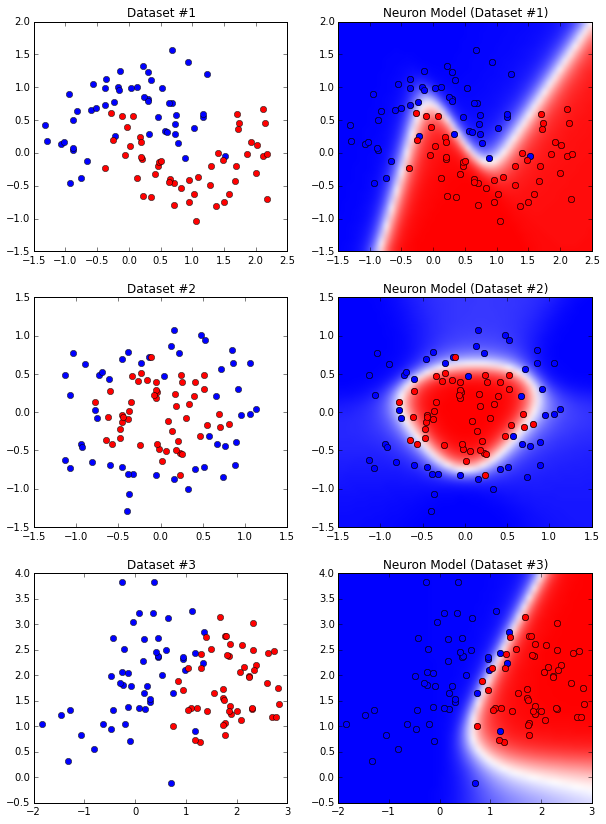

In [10]:
# Nasty plotting code
interpolation='Bicubic'
f, axarr = plt.subplots(len(data_model_list), 2, figsize=(10.,14.))

for dataset_index, (dataset, model) in enumerate(data_model_list):
    xes = defaultdict(list)
    xes_test = defaultdict(list)
    Xes, labels = dataset
    
    for X, label in zip(Xes, labels):
        xes[label].append(X)
        
    
    axarr[dataset_index, 0].plot(zip(*xes[0])[0], zip(*xes[0])[1], c='b', linestyle='None', marker='o')
    axarr[dataset_index, 0].plot(zip(*xes[1])[0], zip(*xes[1])[1], c='r', linestyle='None', marker='o')
    axarr[dataset_index, 0].set_title('Dataset #%i' % (dataset_index+1))
    
    xmin, xmax = axarr[dataset_index, 0].get_xlim()
    ymin, ymax = axarr[dataset_index, 0].get_ylim()
    the_extent = (xmin, xmax, ymin, ymax)
    
    numx = 50
    numy = 50
    dx = (xmax-xmin)/numx
    dy = (ymax-ymin)/numy
    values = np.zeros((numy,numx))
    for i, x in enumerate(np.arange(xmin, xmax, dx)):
        for j, y in enumerate(np.arange(ymin, ymax, dy)):
            output = model.feed_forward([x,y])
            if j<values.shape[0] and i<values.shape[1]:
                values[j,i] = output[0]

    axarr[dataset_index, 1].plot(zip(*xes[0])[0], zip(*xes[0])[1], c='b', linestyle='None', marker='o')
    axarr[dataset_index, 1].plot(zip(*xes[1])[0], zip(*xes[1])[1], c='r', linestyle='None', marker='o')
    axarr[dataset_index, 1].imshow(values, cmap='bwr', interpolation=interpolation, 
                                   extent=the_extent, origin='lowerleft', aspect='auto')
    axarr[dataset_index, 1].plot(zip(*xes[0])[0], zip(*xes[0])[1], c='b', linestyle='None', marker='o')
    axarr[dataset_index, 1].plot(zip(*xes[1])[0], zip(*xes[1])[1], c='r', linestyle='None', marker='o')
    axarr[dataset_index, 1].set_title('Neuron Model (Dataset #%i)' % (dataset_index+1))
plt.savefig(os.path.join(output_dir,'multi_plot.png'), dpi=200)

# Minst Dataset

## Load Dataset from AWS

In [11]:
import urllib
import pickle
result = urllib.urlretrieve("https://s3.amazonaws.com/hudl-hadoop/classifiers101/digits_data.pkl", "digits_data.pkl")

In [12]:
f = open('digits_data.pkl', 'r')
raw_data = pickle.load(f)
f.close()

## Image Downsizing and Preprocessing 

In [13]:
import numpy as np
import random
from PIL import Image

# Helper functions to convert between vector and label representations
def label_to_vector(label):
    return [1. if label==i else 0. for i in range(10)]

def vector_to_label(vector):
    max_value = max(vector)
    for i, value in enumerate(vector):
        if value == max_value:
            return i

# target size
size = (8,8)

# resize elemnt
def resize_element(element):
    img = Image.fromarray(np.reshape(element, (28,28)))
    img.thumbnail(size,Image.ANTIALIAS)
    array = np.asarray(img)
    return [x/256. for x in array.flatten()]

# displays an element
def display_element(element, output_file='', colorbar=True, interpolation='None'):
    img = np.reshape(element, size)
    plt.imshow(img, cmap='Greys', interpolation=interpolation)
    if colorbar:
        plt.colorbar()
    if output_file:
        plt.savefig(output_file)
    plt.show()

# process the data and split into training/testing sets
data = [(resize_element(element), label_to_vector(label)) for element, label in raw_data]
random.shuffle(data)
num_entries = len(data)
pct_train = 0.8
num_train = int(pct_train*num_entries)
data_train, data_test = data[:num_train], data[num_train:]

# Show the statistics of what we're training on and how big the input images are
print "Training examples: %i" % len(data_train)
print "Testing examples: %i" % len(data_test)
print "Image shape: %s" % str(size)

Training examples: 40000
Testing examples: 10000
Image shape: (8, 8)


## Initialize Model

In [14]:
layer1 = Layer(np.product(size), 20, activation=sigmoid, activation_derivative=sigmoid_derivative)
layer2 = Layer(20, 10, activation=sigmoid, activation_derivative=sigmoid_derivative)
nn = NeuralNetwork([layer1, layer2])
epoch = 1.

In [15]:
# train for a few epochs
num_epochs = 20
for i in range(num_epochs):
    # meanwhile calculate our accuracy
    correct = 0.
    total = 0.
    new_data_train = list(data_train)
    # shuffle the training data so we don't get stuck sending it
    # in the same order each time
    random.shuffle(new_data_train)
    for j, (element, label_vector) in enumerate(new_data_train):
        lr = 0.01
        max_norm = 100.
        
        # feed forward
        output = nn.feed_forward(element)
        
        # backpropagate
        nn.backpropagate(label_vector, lr, max_norm=max_norm)
                    
        total += 1.
        # did we classify it correctly
        if vector_to_label(output) == vector_to_label(label_vector):
            correct += 1
    
    # show progress after epoch
    print "Epoch #%i" % epoch
    print "Accuracy: %0.2f%%" % (100.*correct/total)
    epoch += 1

Epoch #1
Accuracy: 45.68%
Epoch #2
Accuracy: 73.35%
Epoch #3
Accuracy: 81.03%
Epoch #4
Accuracy: 84.26%
Epoch #5
Accuracy: 85.77%
Epoch #6
Accuracy: 86.57%
Epoch #7
Accuracy: 87.19%
Epoch #8
Accuracy: 87.64%
Epoch #9
Accuracy: 88.00%
Epoch #10
Accuracy: 88.41%
Epoch #11
Accuracy: 88.65%
Epoch #12
Accuracy: 88.89%
Epoch #13
Accuracy: 89.09%
Epoch #14
Accuracy: 89.29%
Epoch #15
Accuracy: 89.42%
Epoch #16
Accuracy: 89.57%
Epoch #17
Accuracy: 89.79%
Epoch #18
Accuracy: 89.93%
Epoch #19
Accuracy: 90.14%
Epoch #20
Accuracy: 90.20%


### Train for a certain number of epochs

### Confusion Matrix and Performance

In [16]:
confusion_matrix = np.zeros((10,10))
total = 0.
correct = 0.

# build the confusion matrix for the entries in the test set
for j, (element, label_vector) in enumerate(data_test):
    # use the feed forward ONLY
    output = nn.feed_forward(element)
    total += 1.
    # did we get it right?
    if vector_to_label(output) == vector_to_label(label_vector):
        correct += 1
    confusion_matrix[vector_to_label(output), vector_to_label(label_vector)] += 1

# display accuracy
print "Accuracy: %0.2f%%" % (100.*correct/total)

Accuracy: 89.77%


/Users/williamspearman/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


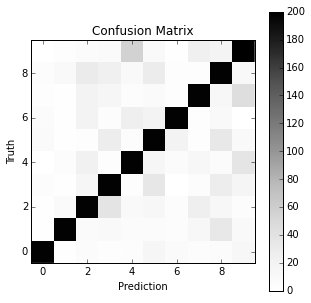

In [17]:
# Display the confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(confusion_matrix, cmap='Greys', interpolation='None', origin='bottom left', vmin=0., vmax=200.)
plt.colorbar()
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(output_dir,'CM.png'), dpi=200)
plt.show()

### Visualizing the Neurons

Neuron #0
Weight for #
3 = -4.73
9 = -3.20
7 = -2.30
4 = 2.25
6 = 2.09
5 = 1.56
0 = 0.75
1 = 0.46
8 = 0.18
2 = -0.11


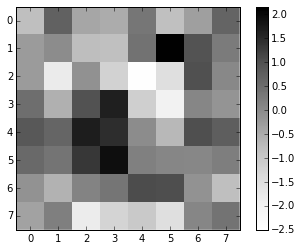

Neuron #1
Weight for #
6 = 3.26
1 = 3.17
3 = -2.54
5 = -2.27
9 = -1.27
0 = -1.07
8 = -1.07
7 = -0.83
2 = -0.49
4 = -0.27


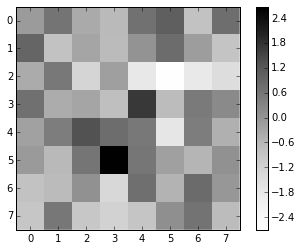

Neuron #2
Weight for #
4 = -3.49
2 = 3.12
9 = -2.91
8 = 2.39
6 = -2.30
5 = -2.19
0 = 1.93
1 = -1.41
3 = 0.78
7 = 0.42


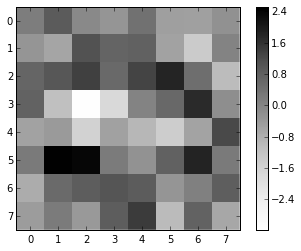

Neuron #3
Weight for #
6 = -3.79
9 = 3.46
4 = 3.06
0 = -2.12
8 = -2.08
7 = -1.94
1 = 1.76
2 = 0.78
5 = -0.68
3 = 0.50


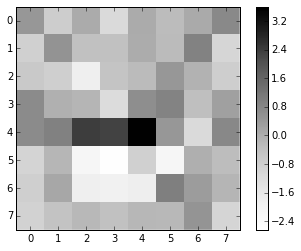

Neuron #4
Weight for #
9 = -3.61
8 = -2.63
2 = 2.49
6 = -2.20
4 = 2.06
7 = 1.52
1 = 1.51
3 = 1.05
0 = -0.71
5 = -0.66


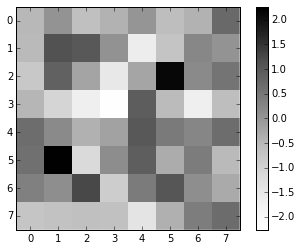

Neuron #5
Weight for #
5 = -5.26
0 = -2.70
3 = -2.53
1 = -2.01
8 = 1.63
4 = -1.45
6 = 1.14
7 = 1.03
2 = -0.42
9 = 0.38


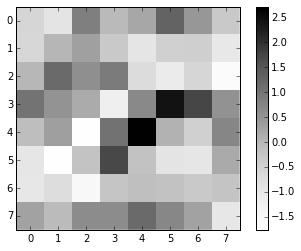

Neuron #6
Weight for #
1 = 2.70
5 = -2.51
3 = 1.92
6 = 1.71
2 = -1.42
4 = 1.18
9 = 0.71
7 = -0.55
0 = -0.39
8 = 0.17


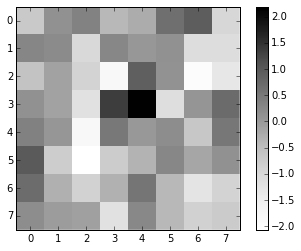

Neuron #7
Weight for #
8 = -4.25
2 = -2.95
1 = -2.01
0 = 1.76
7 = 1.59
9 = -1.51
3 = 1.48
6 = 1.22
4 = -0.38
5 = 0.34


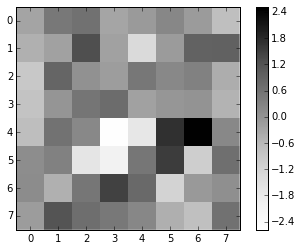

Neuron #8
Weight for #
0 = -4.62
4 = 2.33
9 = -2.31
3 = 1.96
7 = -1.76
1 = -1.66
8 = -1.26
6 = 1.01
2 = 0.76
5 = -0.43


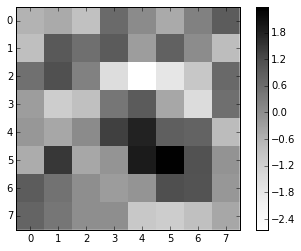

Neuron #9
Weight for #
1 = 3.19
2 = -2.11
3 = -1.84
5 = 1.81
7 = 1.78
8 = -1.46
6 = 0.82
0 = -0.32
9 = 0.32
4 = 0.29


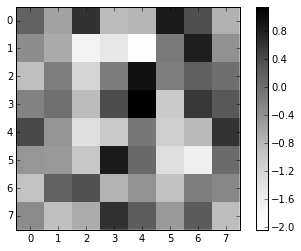

Neuron #10
Weight for #
9 = -3.19
7 = 2.14
4 = 1.61
6 = -1.41
3 = -1.09
8 = -1.07
2 = -0.86
0 = 0.67
1 = -0.58
5 = 0.04


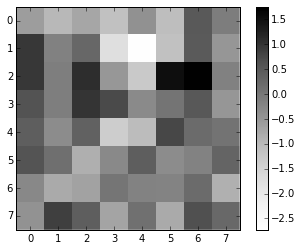

Neuron #11
Weight for #
1 = -2.39
4 = -1.90
3 = -1.17
6 = -0.92
0 = -0.79
8 = -0.74
2 = -0.72
7 = -0.46
9 = -0.41
5 = 0.15


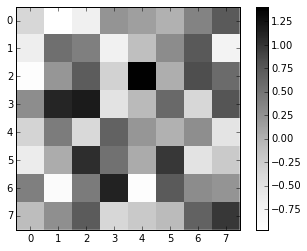

Neuron #12
Weight for #
8 = 3.02
3 = -2.49
2 = -2.34
6 = -2.30
4 = 1.81
1 = -1.64
5 = 1.59
9 = 1.39
0 = -1.12
7 = 0.90


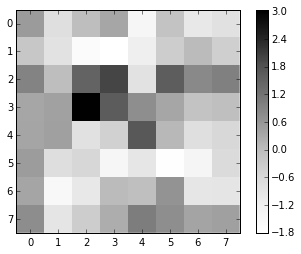

Neuron #13
Weight for #
2 = -3.39
3 = 2.61
0 = -2.53
7 = 2.17
9 = -1.44
5 = 1.04
1 = 1.01
6 = -0.94
4 = -0.48
8 = -0.10


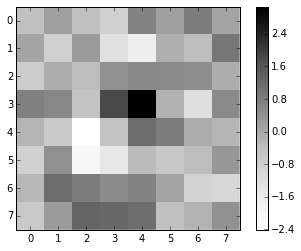

Neuron #14
Weight for #
5 = -3.76
6 = -2.75
4 = -2.21
8 = -1.94
9 = 1.91
1 = -1.87
2 = 0.84
7 = 0.34
3 = -0.19
0 = 0.07


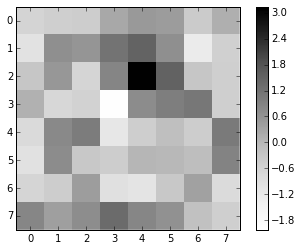

Neuron #15
Weight for #
8 = -3.34
3 = -1.87
4 = -1.69
0 = 1.42
7 = 1.26
6 = -1.00
9 = -0.68
2 = -0.14
5 = 0.10
1 = 0.04


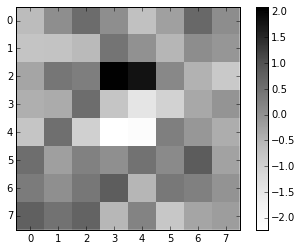

Neuron #16
Weight for #
7 = -4.47
4 = -3.09
8 = 1.83
9 = -1.42
2 = 0.95
3 = 0.88
5 = 0.53
0 = 0.52
1 = -0.26
6 = -0.23


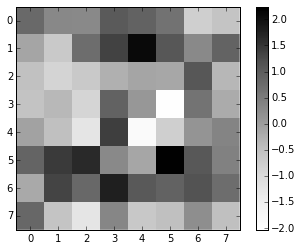

Neuron #17
Weight for #
5 = 3.53
0 = -3.18
4 = -2.16
2 = 1.98
6 = -1.64
7 = 1.20
1 = 1.00
8 = -0.78
3 = -0.70
9 = 0.64


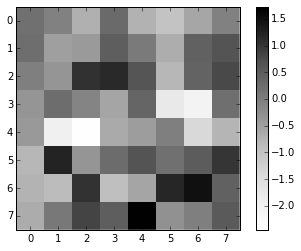

Neuron #18
Weight for #
1 = -5.27
7 = -2.73
2 = -2.38
9 = 1.01
6 = 0.95
0 = 0.84
5 = -0.63
3 = -0.53
4 = 0.42
8 = 0.13


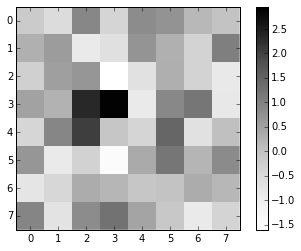

Neuron #19
Weight for #
6 = -3.57
8 = 2.79
7 = -2.46
2 = -2.25
3 = 1.88
1 = 1.53
9 = 1.18
4 = -0.72
0 = -0.46
5 = 0.31


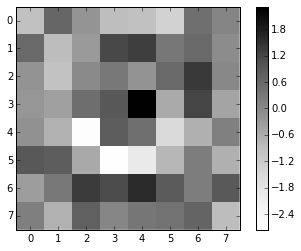

In [18]:
# loop through each Neuron in the hidden layer
for i, neuron in enumerate(layer1.neurons):
    
    # for calculate the weights in the next layer that correspond to this neuron
    # so we can see how it contributes to the various predictions 
    weights = []
    for j, out_neuron in enumerate(layer2.neurons):
        weights.append((out_neuron.weights[i], j))
    weights.sort(key=lambda x: abs(x[0]), reverse=True)
    
    # Display the Neuron
    print "Neuron #%i" % i
    print "Weight for #"
    for weight, number in weights:
        print "%i = %0.2f" % (number, weight)
    # sinc interpolation looks cool 8-)
    display_element(neuron.weights[:-1], interpolation='None', output_file=os.path.join(output_dir,'Neuron%i.png' % i))